# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):

    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean

    U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)
    Vt_reduced = Vt[:n_components, :]  
    X_train_reduced = np.dot(X_train_centered, Vt_reduced.T)

    X_test_centered = X_test - X_mean
    X_test_reduced = np.dot(X_test_centered, Vt_reduced.T)

    return X_train_reduced, X_test_reduced



## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
# You need to decide what number to search...
svd_components = [200, 100, 50, 25, 10, 5]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    # Save the results
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })


Training models with different levels of SVD preprocessing...
Applying custom SVD with 200 components...


d:\Software\Anaconda\envs\CS506\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 64.4475 seconds
Applying custom SVD with 100 components...


d:\Software\Anaconda\envs\CS506\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 22.3102 seconds
Applying custom SVD with 50 components...


d:\Software\Anaconda\envs\CS506\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 7.2687 seconds
Applying custom SVD with 25 components...


d:\Software\Anaconda\envs\CS506\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8855, Training time: 3.3772 seconds
Applying custom SVD with 10 components...


d:\Software\Anaconda\envs\CS506\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 0.6857 seconds
Applying custom SVD with 5 components...


d:\Software\Anaconda\envs\CS506\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 0.3321 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


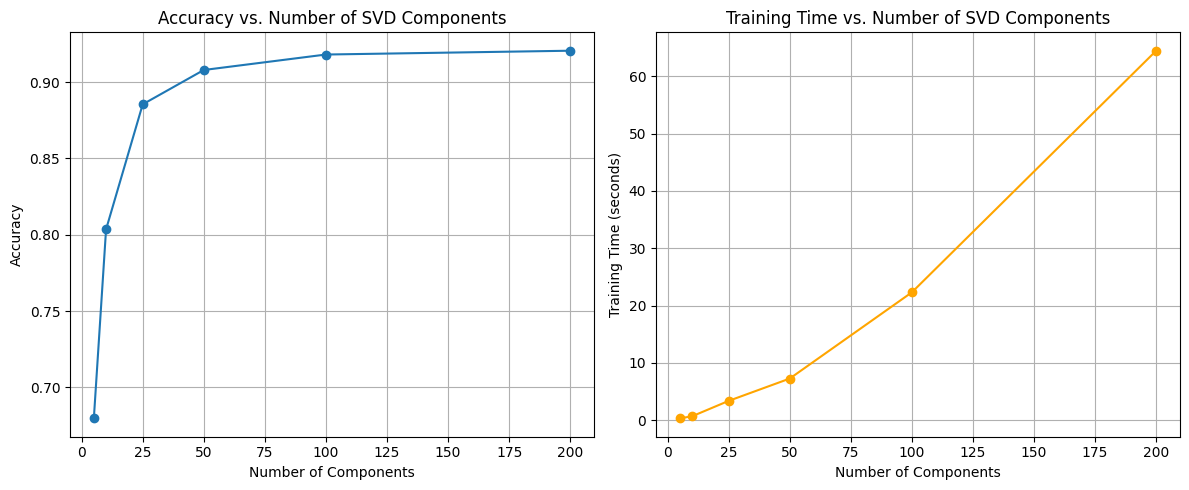


Visualizing the top 5 singular vectors...


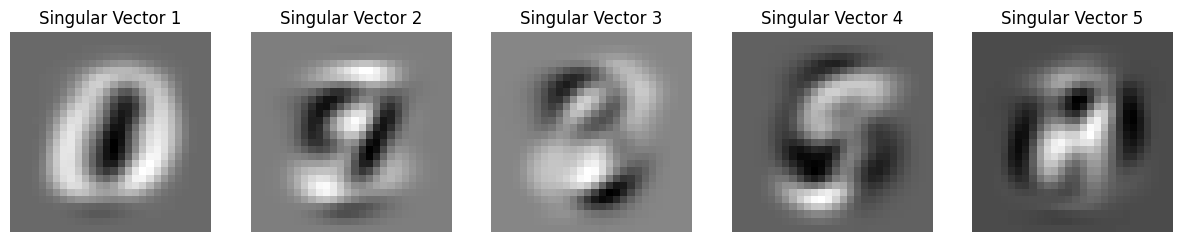

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Extract data for plotting
components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

plt.figure(figsize=(12, 5))

# Plot Accuracy with Number of Components
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time with Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the Top 5 Singular Vectors
print("\nVisualizing the top 5 singular vectors...")

X_mean = np.mean(X_train, axis=0)
X_train_centered = X_train - X_mean
U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

# Plot the top 5 singular vectors as images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    singular_vector = Vt[i].reshape(28, 28)
    axes[i].imshow(singular_vector, cmap='gray')
    axes[i].set_title(f"Singular Vector {i+1}")
    axes[i].axis('off')

plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

As the number of SVD components increases, the model's accuracy gradually improves as well. When the number of SVD components is below 50, the model accuracy increases rapidly. After 50 components, the accuracy tends to stabilize. This indicates that in low-dimensional space, the model may not be able to separate data effectively. To achieve good performance, the model should include at least the first 50 components.

The training efficiency of the model shows an almost linear increase with the rising number of SVD components. When the SVD components are below 50, the training time is very short. However, when the number of components reaches 100 and beyond, the training time increases significantly.

Therefore, considering both accuracy and training efficiency, the optimal number of SVD components should be around 50.